# Download kaggle Data to Colab
if you want to run this script in Google Colab, please run the following code to download and unzip kaggle Datasets.

In [2]:
!pip install -q kaggle

# upload Kaggle API key
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zoeyehdatascience","key":"16dbecc9c0946a68691a239f2ce7fc5f"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file.
!chmod 600 ~/.kaggle/kaggle.json

# download dataset from Kaggle
!kaggle datasets download -d syedabbasraza/suspicious-communication-on-social-platforms
!unzip suspicious-communication-on-social-platforms.zip -d ./dataset

Dataset URL: https://www.kaggle.com/datasets/syedabbasraza/suspicious-communication-on-social-platforms
License(s): unknown
100% 613k/613k [00:00<00:00, 793kB/s]
100% 613k/613k [00:00<00:00, 792kB/s]
Archive:  suspicious-communication-on-social-platforms.zip
  inflating: ./dataset/Suspicious Communication on Social Platforms.csv  


# Download kaggle Data in Kaggle Notebook

In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/suspicious-communication-on-social-platforms/Suspicious Communication on Social Platforms.csv


# Import Python Library

In [41]:
import re
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec

# 第一次使用時需要下載資源
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Functions

In [42]:
# check HTML tag
html_tag_pattern = re.compile(r'<[^>]+>')

def contains_html(text):
    return bool(html_tag_pattern.search(text))

def remove_html_tags(text):
    # 定義正則表達式
    html_tag_pattern = re.compile(r'<[^>]*>')
    # 用空字串替換所有HTML標籤
    return html_tag_pattern.sub('', text)

# remove space and characters
def rm_space_and_characters(text):
    cleaned_text = re.sub(r'\s+', ' ', text).strip()  # \s+ 匹配一個或多個空格
    return cleaned_text

def preprocess_text(text):
    # 分詞
    tokens = word_tokenize(text)

    # 小寫化並去除標點
    tokens = [word.lower() for word in tokens if word.isalpha()]

    # 去除停用詞
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # 詞形還原
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

# load datasets

In [43]:
comms = pd.read_csv("/content/dataset/Suspicious Communication on Social Platforms.csv")
print(comms.shape)
comms.head(2)

(20001, 2)


,comments,tagging
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1


# Data Preprocessing
1. check the null value
2. check the tagging distribution
3. do data preprocessing, like:
    - maker all word lower case  
    - 移除 HTML 標籤、URL、非語義文字 (如隨機符號)
    - 去除多餘的空格或標點
4. 看 tagging = 1 的資料有什麼特徵

In [44]:
# check the null value
comms[comms['comments'].isnull()].shape

(0, 2)

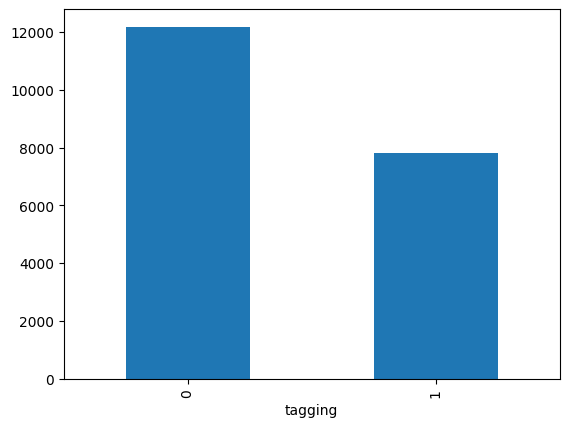

In [45]:
# check the tagging distribution
comms['tagging'].value_counts().plot(kind='bar')
plt.show()

In [46]:
# remove HTML tags
comms['contain_html_comments'] = comms['comments'].apply(lambda s: contains_html(s))
comms['removed_html_comments'] = comms['comments'].apply(lambda s: remove_html_tags(s))

print(f"{sum(comms['contain_html_comments'])} comments contain html tags.")
comms.head(2)

6 comments contain html tags.


,comments,tagging,contain_html_comments,removed_html_comments
0,Get fucking real dude.,1,False,Get fucking real dude.
1,She is as dirty as they come and that crook ...,1,False,She is as dirty as they come and that crook ...


In [47]:
# remove space and characters
comms['cleaned_comments'] = comms['removed_html_comments'].apply(lambda s: rm_space_and_characters(s))

# make all word to lower case
comms['comm_length'] = comms['cleaned_comments'].apply(lambda s: len(s))

comms.head(2)

,comments,tagging,contain_html_comments,removed_html_comments,cleaned_comments,comm_length
0,Get fucking real dude.,1,False,Get fucking real dude.,Get fucking real dude.,22
1,She is as dirty as they come and that crook ...,1,False,She is as dirty as they come and that crook ...,She is as dirty as they come and that crook Re...,126


# Use NLTK or Word2Vec to convert from text to Vector

In [48]:
comms['comments_tokens'] = comms['cleaned_comments'].apply(lambda s: preprocess_text(s))
comms.head(2)

,comments,tagging,contain_html_comments,removed_html_comments,cleaned_comments,comm_length,comments_tokens
0,Get fucking real dude.,1,False,Get fucking real dude.,Get fucking real dude.,22,"[get, fucking, real, dude]"
1,She is as dirty as they come and that crook ...,1,False,She is as dirty as they come and that crook ...,She is as dirty as they come and that crook Re...,126,"[dirty, come, crook, rengel, dems, fucking, co..."


In [39]:
cleaned_corpus = comms['comments_tokens'].values.tolist()
model = Word2Vec(sentences=cleaned_corpus, vector_size=100, window=5, min_count=1, workers=4)